# Chapter 1
The exercises are available here http://www.gatsby.ucl.ac.uk/~dayan/book/exercises/c1/c1.pdf.

In [10]:
from elephant.spike_train_generation import homogeneous_poisson_process
from quantities import Hz, s, ms
import matplotlib.pyplot as plt
import numpy as np

# One

/home/maria/anaconda3/lib/python3.6/site-packages/quantities/quantity.py:321: RuntimeWarning: divide by zero encountered in true_divide
  return np.true_divide(other, self)


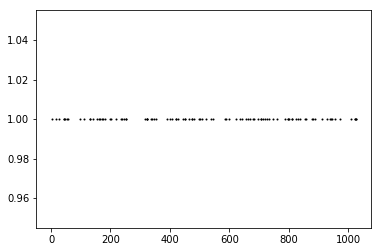

In [12]:
spiketrain=homogeneous_poisson_process(rate=100.0*Hz, t_start=0.0*s, t_stop=10.0*s)
t = spiketrain.rescale(ms)
plt.plot(t[0:100], np.ones_like(t)[0:100], 'k.', markersize=2)

(array([499., 266., 118.,  44.,  32.,  19.,   8.,   0.,   2.,   1.]),
 array([1.93782341e-05, 7.34175373e-03, 1.46641292e-02, 2.19865047e-02,
        2.93088802e-02, 3.66312557e-02, 4.39536312e-02, 5.12760067e-02,
        5.85983822e-02, 6.59207577e-02, 7.32431332e-02]),
 <a list of 10 Patch objects>)

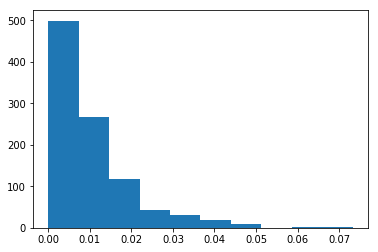

In [16]:
#print(spiketrain)
isi=[]
for spike_ind in range(0,len(spiketrain)-1):
    isi.append(spiketrain[spike_ind+1]-spiketrain[spike_ind])
plt.hist(isi)

In [18]:
variance=np.var(isi)
print(variance)

9.91053738918619e-05


In [20]:
coefficient_of_variation=np.std(isi)/np.mean(isi)
print(coefficient_of_variation)

0.9852671699044839


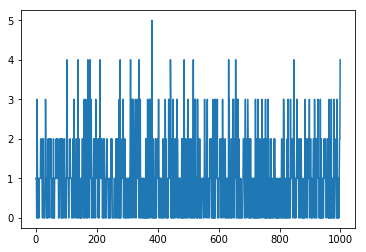

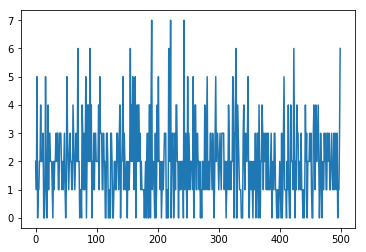

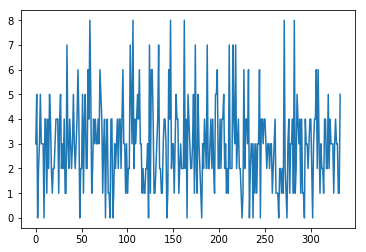

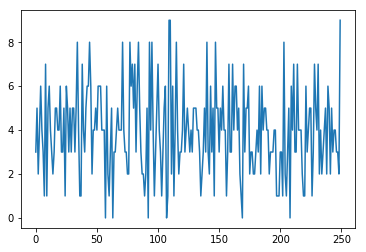

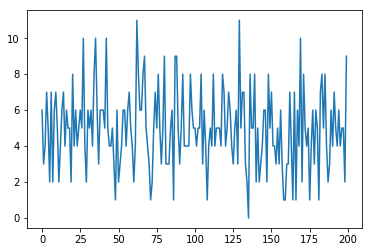

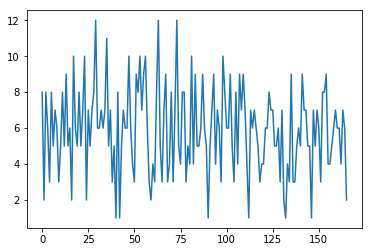

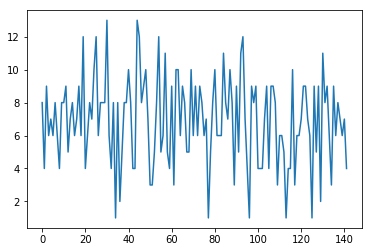

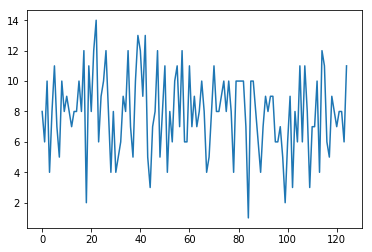

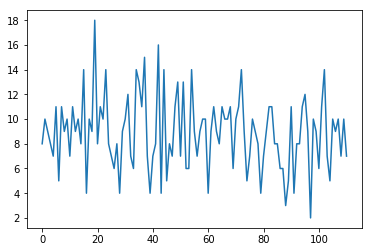

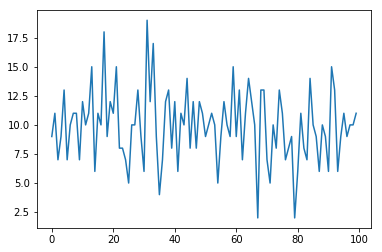

[0.9458999999999999, 1.9716, 3.040517995472951, 3.8704, 4.6575, 5.720750471766586, 6.976195199365205, 6.7456000000000005, 8.679977274571868, 9.41]
[0.99, 1.98, 2.960960960960961, 3.96, 4.95, 5.909638554216867, 6.901408450704225, 7.92, 8.882882882882884, 9.9]
[0.95545455 0.99575758 1.02686865 0.97737374 0.94090909 0.96803729
 1.01083645 0.85171717 0.97715769 0.95050505]


In [50]:
#Binning
import elephant.conversion as conv
import quantities as pq
tbin =np.arange(0.01,0.11,0.01)
var=[]
mean=[]
for bin_ in tbin:
    x = conv.BinnedSpikeTrain(spiketrain, binsize=bin_ * pq.s)
    x=x.to_array()
    plt.plot(x[0])
    plt.show()
    var.append(np.var(x[0]))
    mean.append(np.mean(x[0]))
print(var)
print(mean)
print(np.divide(var,mean))

[0.00980850039841484, 0.00980850039841484, 0.00980850039841484, 0.00980850039841484, 0.00980850039841484, 0.00980850039841484, 0.00980850039841484, 0.00980850039841484, 0.00980850039841484, 0.00980850039841484]


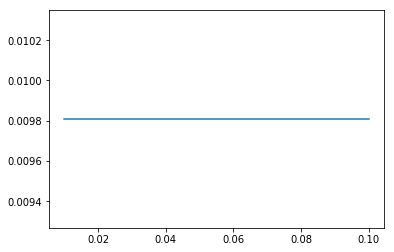

In [49]:
#Fano factor
fano_facs=[]
for ind in range(0,len(tbin)):
    fanofactor=var[ind]/mean[ind]
    fano_facs.append(fano_factor)
plt.plot(tbin,fano_facs)
print(fano_facs)